# 범주형 데이터 시각화

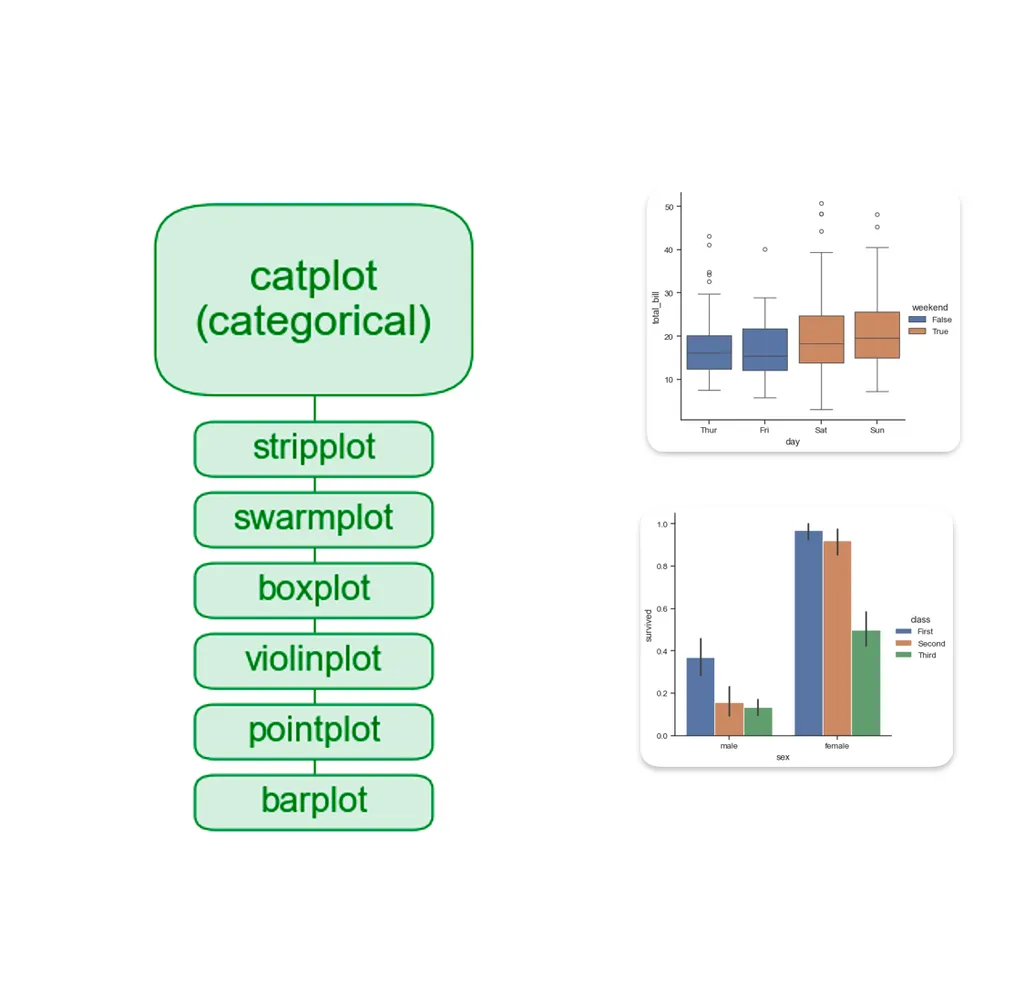

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Bar Plot

### 주요특징

- **범주형 데이터 적합**
    - 범주형 데이터를 시각화 할 때 적합하다.
    - X축에는 범주형 데이터 Y축에는 집계 통계값을 나타낸다.
- **데이터 집계**
    - 막대의 높이는 표본 데이터의 집계 통계값을 나타낸다.
    - 기본적으로 평균 값을 사용하지만 다른 통계 값으로 변경할 수 있다.
- **데이터 비교**
    - 범주형(Category) 변수에 대한 값의 크기를 막대의 높이로 시각화해서 비교하는데 적합하다.
- **데이터 정렬**
    - 필요에 따라 데이터를 정렬해서 시각화해서 표현할 수 있다.
- **신뢰구간**
    - 신뢰구간이 막대의 위아래로 검은선으로 표현된다.
    - 신뢰구간은 해당 집계 통계값이 모집단 평균을 포함할 가능성을 나타낸다.
- **적합한 데이터**
    - 범주형 데이터
    - 이산형 데이터(년도별, 월별 등)

---

### 한계

- **집계 통계값을 대표값으로 사용**
    - 각 범주의 집계 통계값을 사용하여 막대의 높이를 결정하기 때문에 분포를 나타내기 어렵다.
    - 데이터가 비대칭적이거나 이상치의 영향을 많이 받는 경우 해당 특징을 나타내기 어렵다.
- **다양성과 분포의 무시**
    - 각 범주 내 데이터의 분포나 다양성에 대한 정보를 제공하지 못한다.
    - 예를 들어, 데이터가 어떤 범위에 분포하는지, 중앙값은 어떻게 되는지 등의 정보는 파악할 수 없다.

In [6]:
# sns자체 내장 iris 데이터 불러오기

# sepal : 꽃받침
# petal : 꽃 잎
iris = sns.load_dataset("iris")

<Axes: xlabel='species', ylabel='sepal_length'>

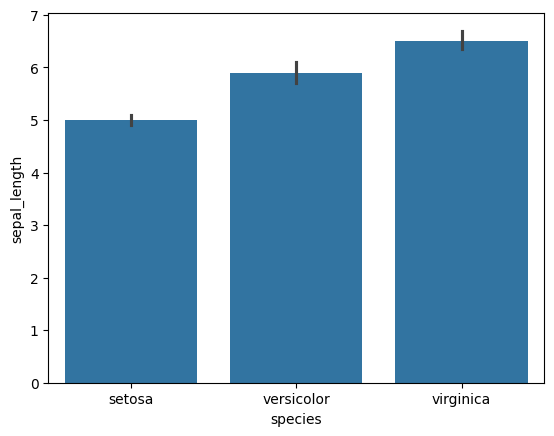

In [9]:
sns.barplot(
    data = iris,
    x = 'species',
    y = "sepal_length",
    estimator = 'median' # 집계함수(기본값 = 평균) / 합 / 최소
    )

# 그래프의 검은색 선은 신뢰구간
# 신뢰 구간 : 검은색 영역에 데이터가 포함되어 있을 확률
# 좁을 수록 분포 구간이 좁다.

## Count Plot

### 주요특징

- **범주형 데이터의 빈도**
    - 범주 데이터의 개수를 막대의 높이로 표현한다.
- **단순하고 직관적인 표현**
    - 막대의 높이가 곧 범주형 데이터의 개수를 표현하므로 기본적인 정보를 쉽게 파악할 수 있다.
- **데이터 그룹화**
    - 데이터를 색상으로 그룹화해서 여러 그룹을 비교할 수 있다.
- **적합한 데이터**
    - 범주형 데이터

---

### (4) 한계

- **수치형 데이터 표현 불가**
    - 범주형 데이터에 적합하며 수치형 데이터는 표현할 수 없다.
- **단일 변수에 초점**
    - 한 개의 범주형 변수에 대한 빈도만을 표현한다.
    - 두 개 이상의 변수 간의 관계나 상호작용을 직접적으로 시각화할 수 없다.
- **데이터 분포 정보 부족**
    - 각 범주의 빈도 수를 막대로 표현하지만, 데이터의 분포와 이상치 같은 추가적인 정보는 제공하지 않는다.
- **대규모 범주 집합 처리**
    - 많은 수의 범주를 가진 변수에 대해 그래프가 과도하게 복잡해지고 해석이 어려워진다.

In [22]:
df = pd.read_csv("/content/drive/MyDrive/PM_교육/DataSets/car_evaluation.csv")
df

,price,maintenance cost,number of doors,number of persons,lug boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


<Axes: xlabel='count', ylabel='class'>

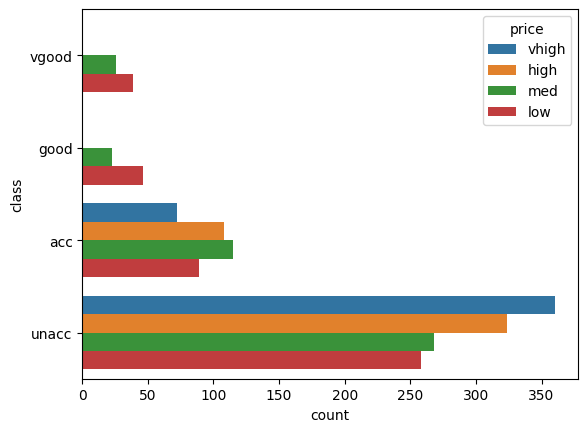

In [20]:
sns.countplot(
    data = df,
    y = 'class',
    order = ["vgood", "good", 'acc', 'unacc'], # 출력 순서
    hue = 'price'
)

<Axes: xlabel='count', ylabel='safety'>

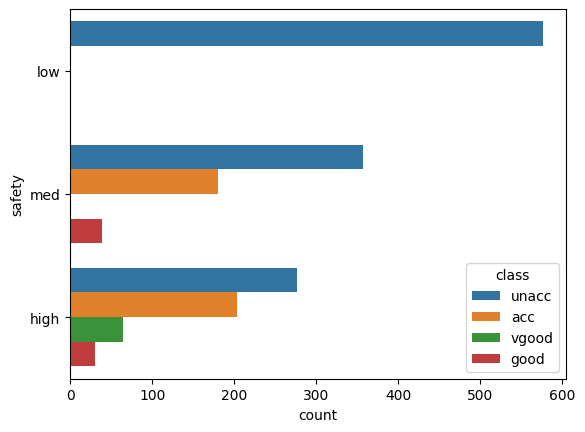

In [23]:
sns.countplot(
    data = df,
    y = 'safety',
    hue = 'class'
)

#그래프를 보고 안정성이 낮은 것이 unacc를 받은 것을 유추 할 수 있다.

## Box Plot

### 주요특징

- **중앙값**
    - 데이터의 중앙값을 표현한다.
- **사분위수 (Quartiles)**
    - 상자 아랫부분은 25% 분위수(Q1)이며, 상자의 윗부분은 75% 분위수(Q3) 를 나타낸다.
    - 상자의 높이는 데이터의 분산 정도를 나타낸다. 즉, 상자의 높이가 낮으면 데이터가 중앙값 주변에 밀집되어 있음을 나타낸다.
- **상자 수염**
    - 상자 위와 아래에 있는 선을 수염(Whiskers)이라고 부르는데 일반적으로 상자의 위쪽으로 뾰족하게 나타나는 수염은 데이터의 최대값을 나타낸다.
    - 아래쪽으로 뾰족한 수염은 데이터의 최소값을 나타낸다.
- **분포 범위 (Range)**
    - 수염의 길이와 중앙값 주변의 상자 높이를 통해 데이터의 분포 범위를 확인할 수 있다.
- **이상치 (Outliers)**
    - 상자에서 수염 부분을 벗어나는 점들은 이상치로 간주된다.
    - 이상치를 식별하고 데이터의 극단값을 확인할 수 있다.
- **범주형 데이터 & 연속형 데이터 적합**
    - 범주형 데이터와 연속형 데이터를 시각화 할 때 적합하다.
    - X축에는 범주형 데이터 Y축에는 연속형 데이터를 매핑해서 시각화한다.

---

### (4) 한계

- **세부 정보 부족**
    - 박스를 통해 분포와 통계치를 보여주지만 세부적인 정보는 알 수 없다.
- **데이터 크기 민감성**
    - 데이터의 수가 적으면 제공하는 정보의 신뢰성이 떨어진다.

In [25]:
car_df = pd.read_csv('/content/drive/MyDrive/PM_교육/DataSets/Car.csv')
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


<Axes: xlabel='transmission', ylabel='selling_price'>

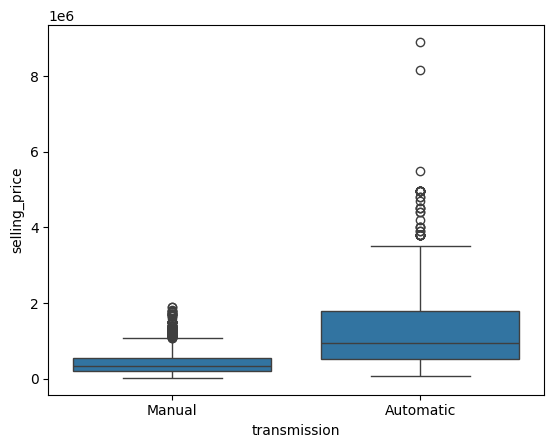

In [28]:
sns.boxplot(
    data = car_df,
    y = 'selling_price',
    x = 'transmission'
)

# [실습]

### (1) 펭귄 데이터 시각화

1. 성별로 구분한 서식지(섬)별 몸무게 평균을 시각화한다.
2. 섬으로 구분한 종의 수를 시각화한다.
3. 펭귄 종 별 무게의 분포도를 Box Plot으로 시각화한다.

### (2) 타이타닉 데이터 시각화

1. 승객 등급별 나이 평균을 시각화한다.
2. 탑승 항구로 구분한 승객 등급별 나이 평균을 시각화한다.
3. 승객 등급별 티켓 요금의 분포도를 Box Plot으로 시각화한다.

In [34]:
penguin_df = sns.load_dataset('penguins')
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<Axes: xlabel='sex', ylabel='body_mass_g'>

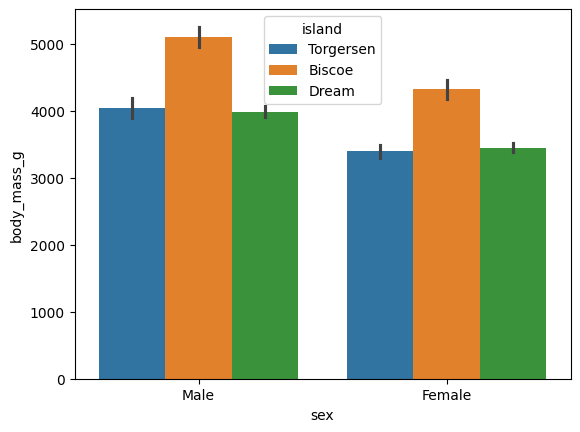

In [35]:
# sex로 구분한 island별 body_mass_g
sns.barplot(
    data = penguin_df,
    x = 'sex',
    y = 'body_mass_g',
    hue = 'island'
)

<Axes: xlabel='island', ylabel='count'>

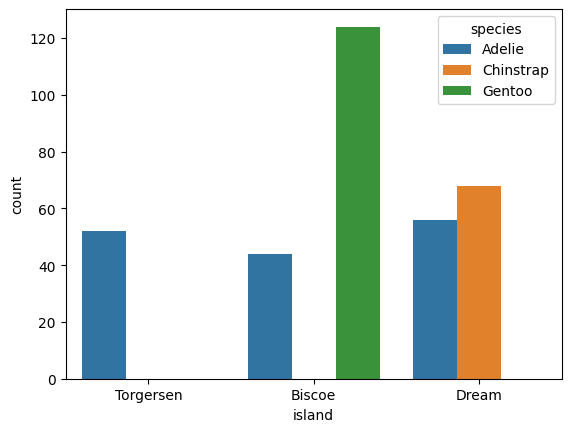

In [36]:
# island로 구분한 species
sns.countplot(
    data = penguin_df,
    x = 'island',
    hue = 'species'
)

<Axes: xlabel='species', ylabel='body_mass_g'>

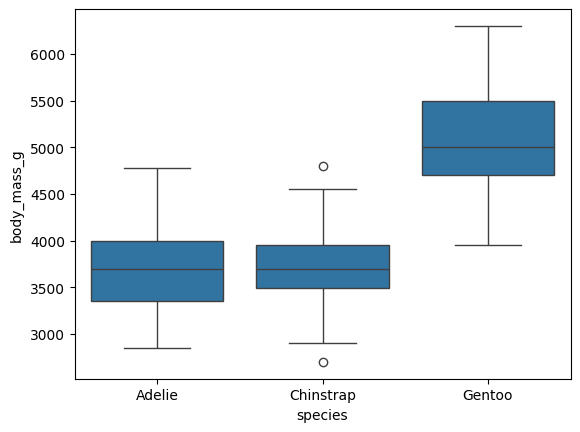

In [37]:
# species 별 body_mass_g의 분포도 (Box Plot)
sns.boxplot(
    data = penguin_df,
    x = 'species',
    y = 'body_mass_g'
)

In [38]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='class', ylabel='age'>

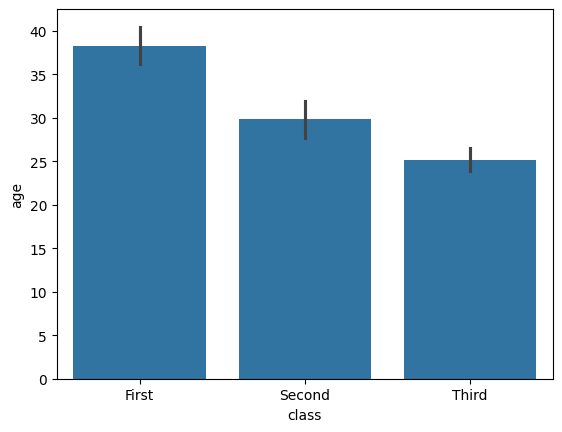

In [43]:
# class별 age 평균
sns.barplot(
    data = titanic_df,
    x = 'class',
    y = 'age',
)

<Axes: xlabel='embark_town', ylabel='age'>

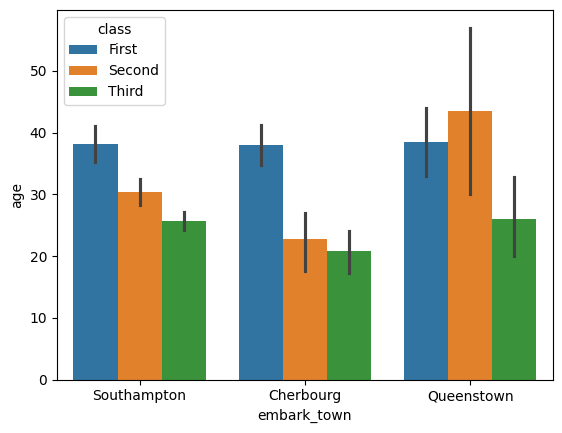

In [44]:
# embark_town로 구분한 class별 age 평균을 시각화한다.
sns.barplot(
    data = titanic_df,
    x = 'embark_town',
    y = 'age',
    hue = 'class'
)

<Axes: xlabel='class', ylabel='fare'>

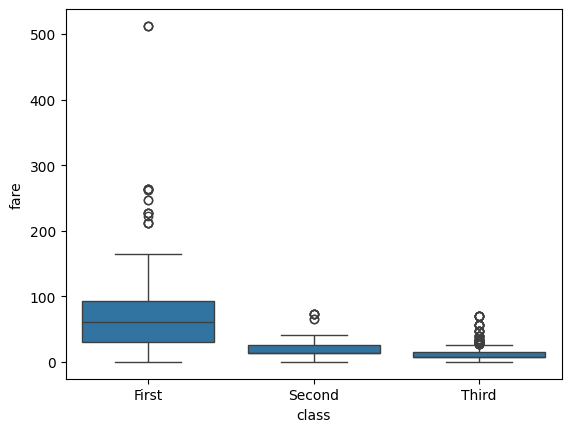

In [45]:
# class별 fare의 분포도 (Box Plot)
sns.boxplot(
    data = titanic_df,
    x = 'class',
    y = 'fare'
)